In [1]:
#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Working with the [rec_sys_merge] table
#### Through Feature Engineering the table has been transformed suitably for Collaborative Filtering

In [7]:
#reading [rec_sys_merge] table for Collaborative filtering
rec_sys_merge = pd.read_csv('/dbfs/mnt/data/sandbox/proportion_spent_rec_sys.csv')

In [8]:
#table shape - rows and columns
rec_sys_merge.shape

Out[3]: (32268, 6)

In [9]:
#Displaying table
rec_sys_merge.head()

,customer_id,category,categoryId,SumAmount_PerCat_PerCust,SumAmount_PerCustomer,proportion_spent
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,Agricultural Services,0,218.35,836.27,0.261100
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,Miscellaneous Stores,6,617.92,836.27,0.738900
2,000c0667-af47-4229-acec-8b98590d1752,Agricultural Services,0,40.38,1977.69,0.020418
3,000c0667-af47-4229-acec-8b98590d1752,Airlines,1,49.00,1977.69,0.024776
4,000c0667-af47-4229-acec-8b98590d1752,Car Rental,3,31.00,1977.69,0.015675


In [10]:
#[Dropping the columns that they will not be used in Collaborative Filtering
#'SumAmount_PerCat_PerCust' and 'SumAmount_PerCustomer'
#they were designed in order to create the column 'proportion_spent'] part of the FEATURE ENGINEERING

to_drop_rec_sys = ['SumAmount_PerCat_PerCust', 'SumAmount_PerCustomer']
rec_sys_merge.drop(to_drop_rec_sys, axis = 1, inplace=True)
rec_sys_merge.head()

,customer_id,category,categoryId,proportion_spent
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,Agricultural Services,0,0.261100
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,Miscellaneous Stores,6,0.738900
2,000c0667-af47-4229-acec-8b98590d1752,Agricultural Services,0,0.020418
3,000c0667-af47-4229-acec-8b98590d1752,Airlines,1,0.024776
4,000c0667-af47-4229-acec-8b98590d1752,Car Rental,3,0.015675


In [11]:
#Limiting floats to five decimal points
#pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
rec_sys_merge.head()

,customer_id,category,categoryId,proportion_spent
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,Agricultural Services,0,0.261100
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,Miscellaneous Stores,6,0.738900
2,000c0667-af47-4229-acec-8b98590d1752,Agricultural Services,0,0.020418
3,000c0667-af47-4229-acec-8b98590d1752,Airlines,1,0.024776
4,000c0667-af47-4229-acec-8b98590d1752,Car Rental,3,0.015675


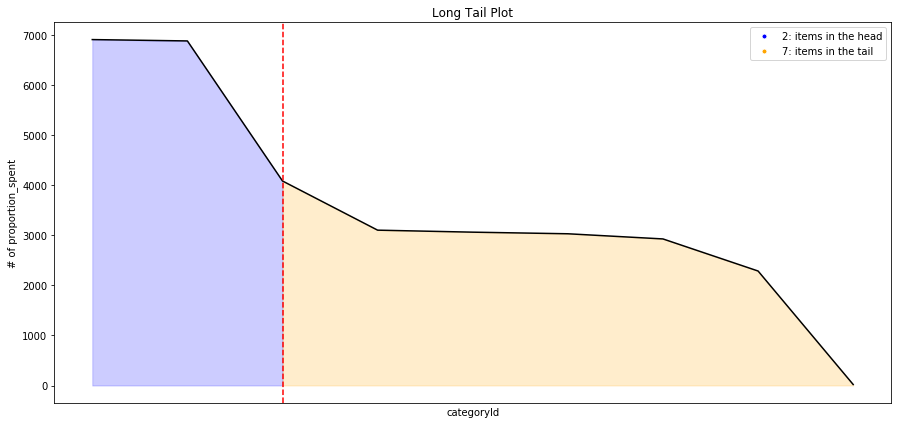

In [13]:
#Long Tail Plot Example

import matplotlib.pyplot as plt
#import recmetrics

fig = plt.figure(figsize=(15, 7))
recmetrics.long_tail_plot(df=rec_sys_merge, 
             item_id_column="categoryId", 
             interaction_type="proportion_spent", 
             percentage=0.5,
             x_labels=False)

### COLLABORATIVE FILTERING

__Recommendation systems__ are a collection of algorithms used to recommend items to users based on information taken from the user. These systems have become ubiquitous and they can be commonly seen in online stores, movies databases and job finders.
In the following commands of this notebook, I will explore recommendation systems based on __Collaborative Filtering__ and implement simple version of one using Python and the Pandas library.

The thechnique of __Collaborative Filtering__, is also known as __User-User Filtering__. As hinted by its alternate name, this technique uses other users to recommend items to the input user. It attempts to find users that have similar preferences and opinions as the input and then recommends items that they have liked to the input. There are several methods of finding similar users (Even some making use of Machine Learning), and the one I will be using here is going to be based on the __Pearson Correlation Function__.

__The process for creating a User Based recommendation system is as follows:__

- Select a user with the categories the user has transacted
- Based on his spend to categories, find the top X neighbours 
- Get the spend category record of the user for each neighbour.
- Calculate a similarity score using some formula
- Recommend the items with the highest score


I begin by creating an __input user__ to recommend Categories to:

Note: Adding more categories, simply by increasing the amount of (category) elements in the userInput.

In [20]:
#userInput = [
#            {'category':'Agricultural Services', 'proportion_spent':0.0192},
#            {'category':'Business Services', 'proportion_spent':47.8142},
#            {'category':'Miscellaneous Stores', 'proportion_spent':1.5572},
#            {'category':'Retail Outlet Services', 'proportion_spent':0.2654000000000001} 
#          ] 
#inputCategories = pd.DataFrame(userInput)
#inputCategories

,category,proportion_spent
0,Agricultural Services,0.019200
1,Business Services,47.814200
2,Miscellaneous Stores,1.557200
3,Retail Outlet Services,0.265400


In [21]:
#Creating an input user/customer to recommend categories 
#The input user has customer_id: '227714a3-e0a9-4260-8d67-fc22665b4992' 
#The ** number of transactions ** that are associated with the input user is equal to 313 transactions.

#userInput = [
#            {'category':'Agricultural Services', 'proportion_spent':0.209110},
#            {'category':'Business Services', 'proportion_spent':0.082534},
#            {'category':'Clothing Stores', 'proportion_spent':0.051550},
#            {'category':'Miscellaneous Stores', 'proportion_spent':0.491298},
#            {'category':'Retail Outlet Services', 'proportion_spent':0.165508} 
#          ] 
#inputCategories = pd.DataFrame(userInput)
#inputCategories

,category,proportion_spent
0,Agricultural Services,0.209110
1,Business Services,0.082534
2,Clothing Stores,0.051550
3,Miscellaneous Stores,0.491298
4,Retail Outlet Services,0.165508


In [22]:
is_mycust = rec_sys_merge['customer_id']=='227714a3-e0a9-4260-8d67-fc22665b4992'    #'00015fc4-6fdc-4120-be42-a49e8bbe8cce', '0016ee8d-e2d6-4dd9-9559-3be13e9f53b5'
print(is_mycust.head())
rec_sys_merge_is_mycust = rec_sys_merge[is_mycust]
print(rec_sys_merge_is_mycust.shape)
display(rec_sys_merge_is_mycust)

customer_id,category,categoryId,proportion_spent
227714a3-e0a9-4260-8d67-fc22665b4992,Agricultural Services,0,0.08465257773910387
227714a3-e0a9-4260-8d67-fc22665b4992,Airlines,1,0.2546177940875575
227714a3-e0a9-4260-8d67-fc22665b4992,Car Rental,3,0.05600447120289916
227714a3-e0a9-4260-8d67-fc22665b4992,Clothing Stores,4,0.008656776129049686
227714a3-e0a9-4260-8d67-fc22665b4992,Lodging,5,0.07944075175531794
227714a3-e0a9-4260-8d67-fc22665b4992,Miscellaneous Stores,6,0.3052403889507093
227714a3-e0a9-4260-8d67-fc22665b4992,Retail Outlet Services,7,0.21138724013536286


In [23]:
#Creating an input user/customer to recommend categories 
#The input user has customer_id: '227714a3-e0a9-4260-8d67-fc22665b4992' 
#The number of transactions that are associated with the input user is equal to 313 transactions.

userInput = [
            {'category':'Agricultural Services', 'proportion_spent':0.08465257773910387},
            {'category':'Airlines', 'proportion_spent':0.2546177940875575},
            {'category':'Car Rental', 'proportion_spent':0.05600447120289916},
            {'category':'Clothing Stores', 'proportion_spent':0.008656776129049686},
            {'category':'Lodging', 'proportion_spent':0.07944075175531794},
            {'category':'Miscellaneous Stores', 'proportion_spent':0.3052403889507093},
            {'category':'Retail Outlet Services', 'proportion_spent':0.21138724013536286} 
          ] 
inputCategories = pd.DataFrame(userInput)
inputCategories

,category,proportion_spent
0,Agricultural Services,0.084653
1,Airlines,0.254618
2,Car Rental,0.056004
3,Clothing Stores,0.008657
4,Lodging,0.079441
5,Miscellaneous Stores,0.305240
6,Retail Outlet Services,0.211387


In [24]:
#shape
inputCategories.shape

Out[10]: (7, 2)

In [25]:
#Filtering out the categories by master-name-category - I create the inputId variable-table which has shape [rows(20,139) , columns 4]
inputId = rec_sys_merge[rec_sys_merge['category'].isin(inputCategories['category'].tolist())]

#Then merging it so we can get the categoryId. It's implicitly merging it by category.
inputCategories = pd.merge(inputId, inputCategories)

#Dropping information we won't use from the input dataframe
inputCategories = inputCategories.drop('customer_id', 1)

#Final input dataframe
#If a category I added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, check capitalisation.
inputCategories

,category,categoryId,proportion_spent
0,Agricultural Services,0,0.084653
1,Airlines,1,0.254618
2,Car Rental,3,0.056004
3,Clothing Stores,4,0.008657
4,Lodging,5,0.079441
5,Miscellaneous Stores,6,0.305240
6,Retail Outlet Services,7,0.211387


In [26]:
inputCategories.shape

Out[8]: (7, 3)

#### The customers who has transacted in the same categories

Now with the category ID's in our input, I can now get the subset of users that are interested and have made transactions in the categories in our input.

In [28]:
#Filtering out customers that have made transaction in the categories that the input has also transacted and storing it
userSubset = rec_sys_merge[rec_sys_merge['categoryId'].isin(inputCategories['categoryId'].tolist())]
userSubset.head()

,customer_id,category,categoryId,proportion_spent
0,00015fc4-6fdc-4120-be42-a49e8bbe8cce,Agricultural Services,0,0.261100
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,Miscellaneous Stores,6,0.738900
2,000c0667-af47-4229-acec-8b98590d1752,Agricultural Services,0,0.020418
3,000c0667-af47-4229-acec-8b98590d1752,Airlines,1,0.024776
4,000c0667-af47-4229-acec-8b98590d1752,Car Rental,3,0.015675


In [29]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['customer_id'])

In [30]:
#let's look at one of the customers, e.g. the one with customer_id='***...ab402e'
userSubsetGroup.get_group('002009ca-739b-48a6-a040-5d46b0ab402e')

,customer_id,category,categoryId,proportion_spent
15,002009ca-739b-48a6-a040-5d46b0ab402e,Agricultural Services,0,0.059193
16,002009ca-739b-48a6-a040-5d46b0ab402e,Miscellaneous Stores,6,0.282747
17,002009ca-739b-48a6-a040-5d46b0ab402e,Retail Outlet Services,7,0.658060


__Let's also sort these groups so the users that share the most categories in common with the input have higher priority. This provides a richer recommendation since we won't go through every single user.__

In [32]:
#Sorting it so Customers with categories most in common with the input customer will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

In [33]:
userSubsetGroup[0:3]

Out[13]: [('01f6db41-59aa-447f-9ce0-e92e429d8941',
 customer_id ... proportion_spent
 265 01f6db41-59aa-447f-9ce0-e92e429d8941 ... 0.001391
 266 01f6db41-59aa-447f-9ce0-e92e429d8941 ... 0.467496
 268 01f6db41-59aa-447f-9ce0-e92e429d8941 ... 0.185690
 269 01f6db41-59aa-447f-9ce0-e92e429d8941 ... 0.001794
 270 01f6db41-59aa-447f-9ce0-e92e429d8941 ... 0.331410
 271 01f6db41-59aa-447f-9ce0-e92e429d8941 ... 0.004759
 272 01f6db41-59aa-447f-9ce0-e92e429d8941 ... 0.002276
 
 [7 rows x 4 columns]),
 ('056a4d7d-1f0a-4d0b-973c-69c838a6b039',
 customer_id ... proportion_spent
 657 056a4d7d-1f0a-4d0b-973c-69c838a6b039 ... 0.014756
 658 056a4d7d-1f0a-4d0b-973c-69c838a6b039 ... 0.459020
 659 056a4d7d-1f0a-4d0b-973c-69c838a6b039 ... 0.050363
 660 056a4d7d-1f0a-4d0b-973c-69c838a6b039 ... 0.013401
 661 056a4d7d-1f0a-4d0b-973c-69c838a6b039 ... 0.271719
 662 056a4d7d-1f0a-4d0b-973c-69c838a6b039 ... 0.070551
 663 056a4d7d-1f0a-4d0b-973c-69c838a6b039 ... 0.120189
 
 [7 rows x 4 columns]),
 ('05bbc0c2-4804-4469-981d-16d75c8b8a36',
 customer_id ... proportion_spent
 724 05bbc0c2-4804-4469-981d-16d75c8b8a36 ... 0.072705
 725 05bbc0c2-4804-4469-981d-16d75c8b8a36 ... 0.027020
 726 05bbc0c2-4804-4469-981d-16d75c8b8a36 ... 0.007836
 727 05bbc0c2-4804-4469-981d-16d75c8b8a36 ... 0.030055
 728 05bbc0c2-4804-4469-981d-16d75c8b8a36 ... 0.028336
 729 05bbc0c2-4804-4469-981d-16d75c8b8a36 ... 0.001254
 730 05bbc0c2-4804-4469-981d-16d75c8b8a36 ... 0.832794
 
 [7 rows x 4 columns])]

#### Similarity of users to input user
Next, I am going to compare all users (not really all !!!) to our specified user and find the one that is most similar.  
I am going to find out how similar each user is to the input through the __Pearson Correlation Coefficient__. It is used to measure the strength of a linear association between two variables. The formula for finding this coefficient between sets X and Y with N values can be seen below. 

Why Pearson Correlation?

Pearson correlation is invariant to scaling, i.e. multiplying all elements by a nonzero constant or adding any constant to all elements. For example, if you have two vectors X and Y,then, pearson(X, Y) == pearson(X, 2 * Y + 3). This is a pretty important property in recommendation systems because for example two users might spend in two series of categories totally different amount in terms of absolute amount, but they would be similar users (i.e. with similar ideas) with similar spending in various scales .

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0 "Pearson Correlation")

The values given by the formula vary from r = -1 to r = 1, where 1 forms a direct correlation between the two entities (it means a perfect positive correlation) and -1 forms a perfect negative correlation. 

In our case, a 1 means that the two users have similar tastes while a -1 means the opposite.

In [35]:
#selecting a subset of users to iterate through. 
#This limit is imposed because we don't want to waste too much time going through every single user.

userSubsetGroup = userSubsetGroup[0:100]

Calculating the __Pearson Correlation__ between _input user_ and _subset group_, and __store it in a dictionary__, where the _key_ is the _user Id_ and the _value_ is the _coefficient_.

In [37]:
#Storing the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

In [38]:
#For every customer group in my subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='categoryId')
    inputCategories = inputCategories.sort_values(by='categoryId')
    #Get the N for the formula
    nSpendings = len(group)
    #Get the proportion of spending scores for the categories that they both have in common
    temp_df = inputCategories[inputCategories['categoryId'].isin(group['categoryId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempSpendingList = temp_df['proportion_spent'].tolist()
    #Putting the current user group spendings in a list format
    tempGroupList = group['proportion_spent'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempSpendingList]) - pow(sum(tempSpendingList),2)/float(nSpendings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nSpendings)
    Sxy = sum( i*j for i, j in zip(tempSpendingList, tempGroupList)) - sum(tempSpendingList)*sum(tempGroupList)/float(nSpendings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0

In [39]:
#Items of the Pearson Correlation dictionary 
pearsonCorrelationDict.items()

Out[17]: dict_items([('01f6db41-59aa-447f-9ce0-e92e429d8941', 0.12066897780172786), ('056a4d7d-1f0a-4d0b-973c-69c838a6b039', 0.4171155783514049), ('05bbc0c2-4804-4469-981d-16d75c8b8a36', 0.23970706779752507), ('078314c2-c4b2-456e-8f89-eb25b64b3636', 0.7920815839861506), ('07eeb56f-d107-4481-8fda-511dda68ad9a', 0.6862276327214972), ('0a036bcc-bc28-40e8-8199-05ba2427cfee', 0.35624616617121246), ('0b56c660-2d1c-489a-b353-7942650788fa', -0.3202541442421348), ('0b7c6df4-6204-44d7-b717-bcf81a1e7918', 0.508982556430031), ('0cd6b8ad-9836-4b73-827e-3fc2c01ab98a', 0.08560125785033988), ('0d091f07-e5fa-470f-81e6-01df080850bd', 0.3245225493370939), ('0d31760b-8c6b-4aaf-af7a-9f34a34ac8a4', 0.6276264222770334), ('0d9f0411-3131-4c1b-b7ae-a2c9182ba701', 0.4116496623080457), ('0e34d723-a7ee-4d17-b825-0ced5011bf50', 0.34095891859078425), ('101dbe0a-039f-4b60-863c-f45e30fd2034', 0.40150892107550346), ('11d9b8a8-62b3-4fd9-b373-e677706b8f91', 0.17831263481922155), ('126af484-628e-466a-ad19-0cc72344b814', 0.7237476272312131), ('14332c39-7fa5-4635-9219-9750ae4ad676', -0.24107208263815488), ('145e86e4-c866-42d9-91d5-8098aeb121a9', 0.0035297490263945983), ('16bcf49b-35dc-404e-8881-2d560cfb2ce6', 0.04070339418948734), ('177c2440-6c9b-40fb-89ed-8a01367d1f67', 0.18546155003429776), ('17957f41-c492-4642-9f46-4665f61a4388', -0.21909853676489965), ('17eae1eb-e360-424b-a054-895a2a808de4', -0.3401219183944139), ('1895dc17-0989-4a4c-ae6a-2a52a4a07b34', 0.35709552144156886), ('196f14ee-34a0-4d7e-966f-38ca31791366', 0.6055785340012284), ('1b208a91-6f7b-4b96-a037-5db1865c7806', 0.07640977170962972), ('1b98ec59-37b9-41f0-9464-5d78c91e503c', -0.3798262089225864), ('1ba04445-5269-4caf-949f-48fe1a5c86f4', -0.4897321998697254), ('1bb54e3d-6c50-4f6c-b904-8f3528b3d3d5', -0.06724093429948148), ('1c27d6bc-c8a1-4605-aa05-e963dc3475b7', -0.2780357189016797), ('1d62d98d-41f2-4729-8f81-2bebaba79826', -0.06746804735317231), ('1dd9a834-ced9-4d0c-9cb8-b6b61e71625f', 0.2096015492043122), ('206b81b1-d96f-4982-80a3-30364d6f79b7', 0.31317128728938837), ('227714a3-e0a9-4260-8d67-fc22665b4992', 1.0), ('2279342f-a872-4a1e-90f2-ca68de800b77', 0.2555137673106672), ('22caa97f-b39c-4db7-b721-1e86ee560a4f', 0.18935089880628952), ('22fa11c6-50e8-4603-ae71-779b8a10a231', 0.684714670252544), ('22ff284b-9f29-4936-8505-a5815adece1b', 0.18987551018510476), ('247c780e-7e60-499e-b51b-5e0a58bf436f', -0.2698223611724347), ('24c07fe9-ec4d-4439-91b8-c8fb8e466bf8', 0.49337658203910284), ('24e4dc87-a6c5-4d6b-ba5e-de722051857f', 0.6967238215957439), ('27776e81-fb3e-4f6e-a299-955d13cb95a8', 0.3042395023487871), ('290c834b-c26e-424d-91d5-cf6f1b935bb1', -0.39633190254611717), ('2a07a952-2208-4263-a059-23f2aa00937a', -0.26347538877850735), ('2adc666a-95a3-47fb-9fdb-9b75c46ef1ec', 0.06113691326278691), ('2ae1ba87-6f19-43dd-a22e-e596fd4ce002', -0.23257306686460721), ('2b261509-fa93-445b-ba07-85cd7b5891d7', -0.12003022128557737), ('2c39e780-334c-48ea-a599-e5c756433fd8', 0.10318589801952169), ('2d04d064-d16b-4cd9-96fd-b3e1c4c702b5', 0.6555990650160394), ('2de9c7a4-8385-4cd2-8e5f-688067599eec', 0.47421214614645185), ('2e157905-b0e0-47d2-83a7-32ba4492bac8', 0.3390602497764227), ('2e37bcdd-04c7-4edf-8b90-e1a6da1f3e20', 0.5265762377102534), ('2e4ff3c5-c290-45f2-96e3-105742b98693', 0.211563427050397), ('2e5ae576-f5be-4c63-b133-74ae87b8b85a', 0.3237267996171344), ('2ff9b1d7-7e40-416e-93f1-5e6b8864f3f6', 0.6036953341835982), ('309e1685-a47d-4946-b376-bb705e10fee9', 0.10878659059406168), ('31b58df6-c80e-4a89-b2bf-4dac3af82f1b', 0.6104999314248162), ('346c2c0d-cf0f-41a9-941a-d029660fb807', -0.2932694657492023), ('353414ac-66ff-4a1a-b4cd-c1b779fdd77a', 0.29838577573016684), ('374f3d88-1e3b-47a8-be4a-7762c8ebf5db', 0.32420285065176085), ('382dd849-20c2-4f27-9f12-5110cdfe4330', 0.7343472560294877), ('39cb448e-bbf4-47f3-b2d0-433b1794b5e1', -0.5669240311479585), ('3af5699a-80a2-43d2-ae90-e93258719e2d', 0.6385207746945272), ('3afb8930-c201-4876-aa7c-d60883de0ff5', -0.5910343453900999), ('3e9b7f5d-7385-4ab8-af58-4dd50805a028', 0

In [40]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['customer_id'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head() #shows 100 customers by not implementing [.head()] - specified previously: userSubsetGroup[0:100]

,similarityIndex,customer_id
0,0.120669,01f6db41-59aa-447f-9ce0-e92e429d8941
1,0.417116,056a4d7d-1f0a-4d0b-973c-69c838a6b039
2,0.239707,05bbc0c2-4804-4469-981d-16d75c8b8a36
3,0.792082,078314c2-c4b2-456e-8f89-eb25b64b3636
4,0.686228,07eeb56f-d107-4481-8fda-511dda68ad9a


The top x similar users to input user

__Getting the top 50 users that are most similar to the input.__

In [42]:
#sorting the values: top 50 users that are most similar to the input

topCustomers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topCustomers.head(10)

,similarityIndex,customer_id
32,1.000000,227714a3-e0a9-4260-8d67-fc22665b4992
3,0.792082,078314c2-c4b2-456e-8f89-eb25b64b3636
59,0.734347,382dd849-20c2-4f27-9f12-5110cdfe4330
15,0.723748,126af484-628e-466a-ad19-0cc72344b814
39,0.696724,24e4dc87-a6c5-4d6b-ba5e-de722051857f
4,0.686228,07eeb56f-d107-4481-8fda-511dda68ad9a
35,0.684715,22fa11c6-50e8-4603-ae71-779b8a10a231
68,0.675696,472a3699-ffab-4975-a905-9fe97613d713
47,0.655599,2d04d064-d16b-4cd9-96fd-b3e1c4c702b5
61,0.638521,3af5699a-80a2-43d2-ae90-e93258719e2d


### Let's start recommending __Categories__ to the input user.

Spending of selected customers to all categories

Going to do this by taking the __weighted average of the 'Proportion Spent'__ of the categories using the Pearson Correlation as the weight. But to do this, I first need to get the _Categories_ by the customers in the ___pearsonDF___ from the _res_sys_df_ dataframe and then store their correlation in a new column called _"similarityIndex"_. This is achieved below by merging of these two tables.

In [45]:
#Merging of these two tables - 'topCustomers' and 'rec_sys_df'

topUsersSpending=topCustomers.merge(rec_sys_merge, left_on='customer_id', right_on='customer_id', how='inner')
topUsersSpending.head()

,similarityIndex,customer_id,category,categoryId,proportion_spent
0,1.0,227714a3-e0a9-4260-8d67-fc22665b4992,Agricultural Services,0,0.084653
1,1.0,227714a3-e0a9-4260-8d67-fc22665b4992,Airlines,1,0.254618
2,1.0,227714a3-e0a9-4260-8d67-fc22665b4992,Car Rental,3,0.056004
3,1.0,227714a3-e0a9-4260-8d67-fc22665b4992,Clothing Stores,4,0.008657
4,1.0,227714a3-e0a9-4260-8d67-fc22665b4992,Lodging,5,0.079441


Now all we need to do is simply multiply the category's __proportion_spent__ by its weight ___(The similarity index)___, then sum up the new proportion_spent and divide it by the sum of the weights.

This can be easily done by simply multiplying the two columns, then grouping up the dataframe by categoryId and then dividing the two columns:

It shows the idea of all similar users to candidate categories for the input user:

In [47]:
#Multiplies the similarity by the customer's proportion_spent (per master category)

topUsersSpending['weightedRating'] = topUsersSpending['similarityIndex']*topUsersSpending['proportion_spent']
topUsersSpending.head()

,similarityIndex,customer_id,category,categoryId,proportion_spent,weightedRating
0,1.0,227714a3-e0a9-4260-8d67-fc22665b4992,Agricultural Services,0,0.084653,0.084653
1,1.0,227714a3-e0a9-4260-8d67-fc22665b4992,Airlines,1,0.254618,0.254618
2,1.0,227714a3-e0a9-4260-8d67-fc22665b4992,Car Rental,3,0.056004,0.056004
3,1.0,227714a3-e0a9-4260-8d67-fc22665b4992,Clothing Stores,4,0.008657,0.008657
4,1.0,227714a3-e0a9-4260-8d67-fc22665b4992,Lodging,5,0.079441,0.079441


In [48]:
#Applies a sum to the topCustomers after grouping it up by customer_id

tempTopUsersSpending = topUsersSpending.groupby('categoryId').sum()[['similarityIndex','weightedRating']]
tempTopUsersSpending.columns = ['sum_similarityIndex','sum_weightedSpending']
tempTopUsersSpending.head()

,sum_similarityIndex,sum_weightedSpending
categoryId,,
0,25.182661,0.988944
1,25.182661,4.306143
2,6.124331,0.332814
3,25.182661,1.252989
4,25.182661,1.378608


In [49]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()

#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersSpending['sum_weightedSpending']/tempTopUsersSpending['sum_similarityIndex']
recommendation_df['categoryId'] = tempTopUsersSpending.index
recommendation_df.head()

,weighted average recommendation score,categoryId
categoryId,,
0,0.039271,0
1,0.170996,1
2,0.054343,2
3,0.049756,3
4,0.054744,4


Now let's sort it and see the top 5 categories that the algorithm recommended!

In [51]:
#let's sort it and see the top 5 categories that the algorithm recommended

recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head()

,weighted average recommendation score,categoryId
categoryId,,
6,0.394963,6
1,0.170996,1
7,0.144820,7
5,0.132234,5
4,0.054744,4


In [52]:
rec_sys_merge.loc[rec_sys_merge['categoryId'].isin(recommendation_df.head()['categoryId'].tolist())]

,customer_id,category,categoryId,proportion_spent
1,00015fc4-6fdc-4120-be42-a49e8bbe8cce,Miscellaneous Stores,6,0.738900
3,000c0667-af47-4229-acec-8b98590d1752,Airlines,1,0.024776
5,000c0667-af47-4229-acec-8b98590d1752,Retail Outlet Services,7,0.939131
8,0016ee8d-e2d6-4dd9-9559-3be13e9f53b5,Miscellaneous Stores,6,0.031360
9,0016ee8d-e2d6-4dd9-9559-3be13e9f53b5,Retail Outlet Services,7,0.005345
11,0019acea-38df-4de4-8b01-3b6dcf048f45,Airlines,1,0.155789
13,0019acea-38df-4de4-8b01-3b6dcf048f45,Lodging,5,0.482654
14,0019acea-38df-4de4-8b01-3b6dcf048f45,Miscellaneous Stores,6,0.222644
16,002009ca-739b-48a6-a040-5d46b0ab402e,Miscellaneous Stores,6,0.282747
17,002009ca-739b-48a6-a040-5d46b0ab402e,Retail Outlet Services,7,0.658060


# Evaluation

To load a dataset from a pandas dataframe, I will need the load_from_df() method. I will also need a Reader object. The dataframe must have three columns, corresponding to the user/customer (raw) ids, the category (raw) ids, and the proportion_spent in this order.

In [55]:
#import reader and dataset from surprise

from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(rec_sys_merge[['customer_id', 'categoryId', 'proportion_spent']], reader)

The next step is splitting our dataset in train and test set in a ratio of 75%:25%

In [57]:
#Train and test split

from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

I’ll be using the famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize. SVD is a Matrix Factorization techniques are usually more effective because they allow us to discover the latent features underlying the interactions between users and items.

In [59]:
#Train the model - SVD algorithm (1 OR GENERAL) 

from surprise import SVD, accuracy
algo_SVD = SVD()
algo_SVD.fit(trainset)

Out[35]: <surprise.prediction_algorithms.matrix_factorization.SVD at 0x7fa480b7f940>

In [60]:
#Predictions on the test set (1)
predictions = algo_SVD.test(testset)
predictions[0:5]

Out[36]: [Prediction(uid='c737dac8-78be-494f-8503-77ac1f7678eb', iid=6, r_ui=0.9388327530097176, est=1, details={'was_impossible': False}),
 Prediction(uid='faab0b8d-c556-4ad3-8474-a507f84a000a', iid=2, r_ui=1.0, est=1, details={'was_impossible': False}),
 Prediction(uid='cb62e1a4-00cc-4080-8f13-7f4ef143019b', iid=0, r_ui=0.1592998390688036, est=1, details={'was_impossible': False}),
 Prediction(uid='3472f2f1-bd20-46a0-ba15-2bd1fb5760c2', iid=1, r_ui=0.11251508104037668, est=1, details={'was_impossible': False}),
 Prediction(uid='0183c424-98ff-46d4-8ad1-2f58c596fb08', iid=5, r_ui=0.2209930554217177, est=1, details={'was_impossible': False})]

###Evaluation RMSE

Singular vector decomposition (SVD) shown here employs the use of gradient descent to minimize the squared error between predicted rating and actual rating, eventually getting the best model.

In [62]:
#accuracy, using RMSE

from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.7792
Out[38]: 0.7792344021538272

In [63]:
#Cross validation

#split the dataset for 5-fold cross-validation, and compute the MAE and RMSE of the SVD algorithm.

from surprise.model_selection import cross_validate

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

 Fold 1 Fold 2 Fold 3 Fold 4 Fold 5 Mean Std 
RMSE (testset) 0.7804 0.7819 0.7809 0.7823 0.7817 0.7814 0.0007 
MAE (testset) 0.7209 0.7213 0.7206 0.7208 0.7218 0.7211 0.0004 
Fit time 1.66 1.66 1.65 1.72 1.65 1.67 0.03 
Test time 0.09 0.05 0.11 0.06 0.05 0.07 0.02 
Out[40]: {'test_rmse': array([0.78038046, 0.78188646, 0.7808998 , 0.78228091, 0.78167677]),
 'test_mae': array([0.72090237, 0.72134543, 0.720592 , 0.72081093, 0.72177886]),
 'fit_time': (1.6554601192474365,
 1.6571154594421387,
 1.6484947204589844,
 1.7249929904937744,
 1.6481268405914307),
 'test_time': (0.08544397354125977,
 0.05011916160583496,
 0.10695314407348633,
 0.05585813522338867,
 0.05488014221191406)}

In [64]:
#make predictions on test set - showing 'actual' and 'cf_predictions' (2)
pred_test = algo_SVD.test(testset)
pred_test = pd.DataFrame(pred_test)
pred_test.drop("details", inplace=True, axis=1)
pred_test.columns = ['customer_id', 'categoryId', 'actual', 'cf_predictions']
pred_test.head()

,customer_id,categoryId,actual,cf_predictions
0,c737dac8-78be-494f-8503-77ac1f7678eb,6,0.938833,1
1,faab0b8d-c556-4ad3-8474-a507f84a000a,2,1.000000,1
2,cb62e1a4-00cc-4080-8f13-7f4ef143019b,0,0.159300,1
3,3472f2f1-bd20-46a0-ba15-2bd1fb5760c2,1,0.112515,1
4,0183c424-98ff-46d4-8ad1-2f58c596fb08,5,0.220993,1


In [65]:
#Recmetrics: MSE, RMSE

import recmetrics

#evaluate model with MSE and RMSE
print(recmetrics.mse(pred_test.actual, pred_test.cf_predictions))
print(recmetrics.rmse(pred_test.actual, pred_test.cf_predictions))


0.6072062535000325
0.7792344021538272

In [66]:
#create model (matrix of predicted values)
cf_model = pred_test.pivot_table(index='customer_id', columns='categoryId', values='cf_predictions').fillna(0)

In [67]:
#function for recommended items

def get_users_predictions(customer_id, n, model):
    recommended_items = pd.DataFrame(model.loc[customer_id])
    recommended_items.columns = ["predicted_Cat"]
    recommended_items = recommended_items.sort_values('predicted_Cat', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [68]:
#format test data
pred_test = pred_test.copy().groupby('customer_id')['categoryId'].agg({'actual': (lambda x: list(set(x)))})
#make recommendations for all members in the test data
cf_recs = [] = []
for user in pred_test.index:
    cf_predictions = get_users_predictions(user, 10, cf_model)
    cf_recs.append(cf_predictions)
        
pred_test['cf_predictions'] = cf_recs
pred_test.head()

,actual,cf_predictions
customer_id,,
000c0667-af47-4229-acec-8b98590d1752,"[0, 3]","[0, 3, 1, 2, 4, 5, 6, 7, 8]"
0016ee8d-e2d6-4dd9-9559-3be13e9f53b5,"[6, 7]","[6, 7, 0, 1, 2, 3, 4, 5, 8]"
0019acea-38df-4de4-8b01-3b6dcf048f45,[5],"[5, 0, 1, 2, 3, 4, 6, 7, 8]"
0023c164-f35c-4f67-b706-d6954c0e816c,"[0, 6]","[0, 6, 1, 2, 3, 4, 5, 7, 8]"
002b0186-9b02-48ac-823e-44d66cc7684a,[7],"[7, 0, 1, 2, 3, 4, 5, 6, 8]"


### Popularity Recommender
Creating a simple popularity recommender to demonstrate recommender metrics in action. The popularity recommender simply recommends the top 10 movies to every user.

In [70]:
#make recommendations for all members in the test data
popularity_recs = rec_sys_merge.categoryId.value_counts().head(10).index.tolist()

pop_recs = []
for user in pred_test.index:
    pop_predictions = popularity_recs
    pop_recs.append(pop_predictions)
        
pred_test['pop_predictions'] = pop_recs
pred_test.head()

,actual,cf_predictions,pop_predictions
customer_id,,,
000c0667-af47-4229-acec-8b98590d1752,"[0, 3]","[0, 3, 1, 2, 4, 5, 6, 7, 8]","[0, 6, 7, 5, 1, 4, 3, 2, 8]"
0016ee8d-e2d6-4dd9-9559-3be13e9f53b5,"[6, 7]","[6, 7, 0, 1, 2, 3, 4, 5, 8]","[0, 6, 7, 5, 1, 4, 3, 2, 8]"
0019acea-38df-4de4-8b01-3b6dcf048f45,[5],"[5, 0, 1, 2, 3, 4, 6, 7, 8]","[0, 6, 7, 5, 1, 4, 3, 2, 8]"
0023c164-f35c-4f67-b706-d6954c0e816c,"[0, 6]","[0, 6, 1, 2, 3, 4, 5, 7, 8]","[0, 6, 7, 5, 1, 4, 3, 2, 8]"
002b0186-9b02-48ac-823e-44d66cc7684a,[7],"[7, 0, 1, 2, 3, 4, 5, 6, 8]","[0, 6, 7, 5, 1, 4, 3, 2, 8]"


### Random Recommender
Creating a simple random recommender to demonstrate recommender metrics in action. The random recommender simply recommends 10 random movies to every user.

In [72]:
#make recommendations for all members in the test data

ran_recs = []
for user in pred_test.index:
    random_predictions = rec_sys_merge.categoryId.sample(10).values.tolist()
    ran_recs.append(random_predictions)
        
pred_test['random_predictions'] = ran_recs
pred_test.head()

,actual,cf_predictions,pop_predictions,random_predictions
customer_id,,,,
000c0667-af47-4229-acec-8b98590d1752,"[0, 3]","[0, 3, 1, 2, 4, 5, 6, 7, 8]","[0, 6, 7, 5, 1, 4, 3, 2, 8]","[6, 6, 0, 7, 6, 3, 4, 6, 6, 2]"
0016ee8d-e2d6-4dd9-9559-3be13e9f53b5,"[6, 7]","[6, 7, 0, 1, 2, 3, 4, 5, 8]","[0, 6, 7, 5, 1, 4, 3, 2, 8]","[6, 6, 1, 3, 4, 3, 7, 1, 6, 5]"
0019acea-38df-4de4-8b01-3b6dcf048f45,[5],"[5, 0, 1, 2, 3, 4, 6, 7, 8]","[0, 6, 7, 5, 1, 4, 3, 2, 8]","[1, 0, 5, 6, 7, 6, 0, 1, 6, 3]"
0023c164-f35c-4f67-b706-d6954c0e816c,"[0, 6]","[0, 6, 1, 2, 3, 4, 5, 7, 8]","[0, 6, 7, 5, 1, 4, 3, 2, 8]","[0, 7, 1, 7, 0, 6, 0, 4, 6, 2]"
002b0186-9b02-48ac-823e-44d66cc7684a,[7],"[7, 0, 1, 2, 3, 4, 5, 6, 8]","[0, 6, 7, 5, 1, 4, 3, 2, 8]","[3, 6, 3, 0, 4, 6, 5, 6, 7, 1]"


In [73]:
actual = pred_test.actual.values.tolist()
cf_predictions = pred_test.cf_predictions.values.tolist()
pop_predictions = pred_test.pop_predictions.values.tolist()
random_predictions = pred_test.random_predictions.values.tolist()

In [74]:
pop_mark = []
for K in np.arange(1, 11):
    pop_mark.extend([recmetrics.mark(actual, pop_predictions, k=K)])
pop_mark

Out[71]: [0.22154448969517462,
 0.3501311242749599,
 0.40437543708091656,
 0.4336331194207907,
 0.4575761035007611,
 0.4801217656012176,
 0.4985734854228005,
 0.5113928115982911,
 0.5115573597080447,
 0.5115573597080447]

In [75]:
random_mark = []
for K in np.arange(1, 11):
    random_mark.extend([recmetrics.mark(actual, random_predictions, k=K)])
random_mark

Out[72]: [0.15388127853881278,
 0.22356226089102801,
 0.2634394668641244,
 0.29010860175243736,
 0.30841046525978033,
 0.3213573162203299,
 0.33006925712405166,
 0.3373420264687388,
 0.3430360766833369,
 0.3474628322059829]

In [76]:
cf_mark = []
for K in np.arange(1, 11):
    cf_mark.extend([recmetrics.mark(actual, cf_predictions, k=K)])
cf_mark

Out[73]: [0.7947334320621992,
 0.9643280266567936,
 0.9950851536467974,
 0.9993088979390349,
 0.9998765889176847,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

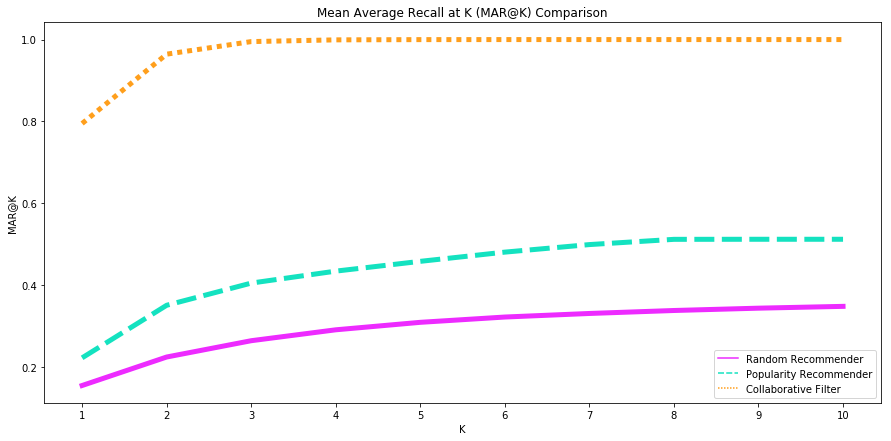

In [77]:
mark_scores = [random_mark, pop_mark, cf_mark]
index = range(1,10+1)
names = ['Random Recommender', 'Popularity Recommender', 'Collaborative Filter']

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)

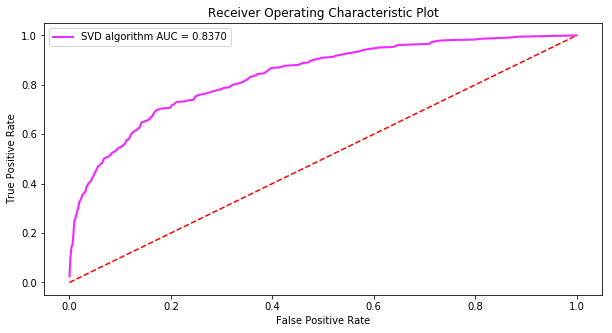

In [78]:
import numpy as np

model_probs = np.concatenate([np.random.normal(loc=.2, scale=0.5, size=500), np.random.normal(loc=.9, scale=0.5, size=500)])
actual = [0] * 500
class_zero_actual = [1] * 500
actual.extend(class_zero_actual)

recmetrics.roc_plot(actual, model_probs, model_names="SVD algorithm",  figsize=(10, 5))

### Precision Recall Curve

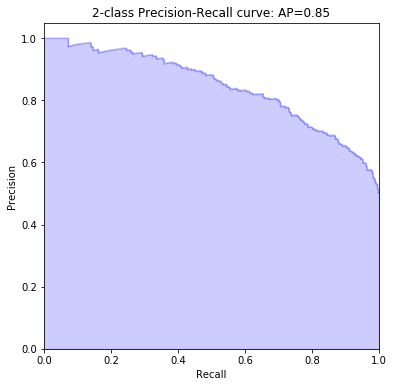

In [80]:
recmetrics.precision_recall_plot(targs=actual, preds=model_probs)